# In-Class Project Session Plan

<table>
  <thead>
    <tr>
      <th>Time</th>
      <th>Activity</th>
      <th>Description</th>
    </tr>
  </thead>
  
  <tbody>
    <tr>
      <td>0-20 min</td>
      <td>Introduction & Project Overview</td>
      <td>- Briefly recap key computer vision concepts relevant to the projects.  <br> - Clearly explain the project goals and deliverables. <br> - Introduce the different project themes for each group to choose from.</td>
    </tr>
    <tr>
      <td>20-30 min</td>
      <td>Project Set-up & Resource Sharing</td>
      <td>- Provide students with access to necessary coding libraries, datasets, and etc. <br> - Students to ask clarifying questions about their chosen tasks.</td>
    </tr>
    <tr>
      <td>30-90 min</td>
      <td>Group Work & Coding</td>
      <td>- Students work in their assigned groups on their projects. <br> - Encourage collaboration and problem-solving within the groups. <br> - Lecturer circulates to offer guidance and answer individual group questions.</td>
    </tr>
    <tr>
      <td>90-110 min</td>
      <td>Progress Sharing & Presentation</td>
      <td>- Each group presents a short summary of their progress and any challenges encountered. <br> - Facilitate a class discussion on different approaches and solutions for the tasks. <br> - Each group hand in the work done.</td>
    </tr>
      <tr>
          <td>110-120 min</td>
          <td> Break </td>
          <td> </td>
      </tr>
      <tr>
          <td>120min-180min</td>
          <td>Demo</td>
          <td>- Live coding example of some relevant methods. <br> - Q&A session.</td>
</tbody>
</table>

> Weekly activities 👨‍💻
> 
> Every group leader have to upload the in-class group project (coding files + image outputs (if any)) on *GitHub repo* or submit the files to me via *UTAR email* at the end of the practical class. This project will be counted as weekly activity submission. Please specify your **group number** and **practical groups** either on the file names or in your notebook files.

# In-class Projects
1. Red & green apples detection
2. Circles detection
3. Rectangles detection
4. Document optical character recognition (OCR)

For detailed project overview and deliverables, please refer to the relevant [GitHub repo](https://github.com/Jacky-lim-data-analyst/mini_project_cv.git).

# Demo of color-based segmentation approach

## Color space / color model
In the most common color space, RGB (Red Green Blue), colors are represented in terms of their red, green, and blue components. In more technical terms, RGB describes a color as a tuple of 3 components. Each component can take a value between 0 and 255, where the tuple (0, 0, 0) represents black and (255, 255, 255) represents white. RGB is considered an "additive" color space, and colors can be imagined as being produced from shining quantities of red, blue and green light onto a black background.

There are so many color spaces because different color spaces are useful for different purposes. We will typically work with 3 kinds of color models: blue-green-red (BGR), grayscale and hue-saturation-value (HSV).

In reality, color is a continuous phenomenon, meaning that there are an infinite number of colors. Color spaces, however represent color through discrete structures (a fixed number of whole number integer values), which is acceptable since the human eye and perception are also limited. 

### RGB color space
It is an additive colorspace where colors are obtained by a linear combination of Red, Green and Blue values. 

There are some inherent problems asociated with RGB colorspace:
- significant perceptual non-uniformity.
- mixing of chrominance and luminance data.

### LAB color space
3 components:
- L: lightness (intensity).
- A: color component ranging from green to red.
- B: color component ranging from blue to yellow.

The L component is independent of color information and encodes brightness only. 

### YCrCb color space
Like LAB colorspace, the luminance and chrominances are separated into different channels. Y is used to represent luminance (or luma), Cb represents blue-difference, and Cr represents red-difference.

### HSV / HSI color space
1. Hue is the color attribute that describes pure color. 
2. Saturation is the quantity that reflect the degree to which pure color is diluted by white light.
3. Value or intensity is brightness.

![hsv cylindrical spectrum](img_embed/hsv_cylindrical.jfif "HSV")

In OpenCV, hue range is $[0,179]$, saturation range is $[0,255]$, and value range is $[0,255]$. Different software use different scales. So if you are comparing OpenCV values with them, you need to **normalize these ranges**. 

The important takeaway is: *Lighting condition can mean the difference between success and failure of your computer vision algorithm.* Thus, color space which could factor out luminance into different channel should be the choice.

### Changing Color-space
There are more than 150 color-space conversion methods available in OpenCV. In fact, OpenCV has more than 300 flags for color spaces conversion.
```python
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print(flags)
```

**Tips**
---
How to find HSV values of a certain color? Below is an example:
```python
green = np.uint8([[[0,255,0]]])
hsv_green = cv.cvtColor(green, cv.COLOR_BGR2HSV)
print(hsv_green)
```
Alternatively, you can just simply use any [online converters](https://codebeautify.org/hex-to-hsv-converter) or refer to the example below.

# Setup

In [2]:
import sys
assert sys.version_info >= (3, 8)

import cv2 as cv
import numpy as np

if not cv.useOptimized():
    cv.setUseOptimized(True)

cv.useOptimized()

True

## Number of color related opencv API

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]

len(flags)

374

## Example of color space segmentation

In [3]:
img = cv.imread("images/color_spaces/pant.jfif")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

In [5]:
# import some other external libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import matplotlib.pyplot as plt

The following code chunk let you set up the pixel colors. In order to color each pixel according to its true color, there's a bit of reshaping and normalization required.

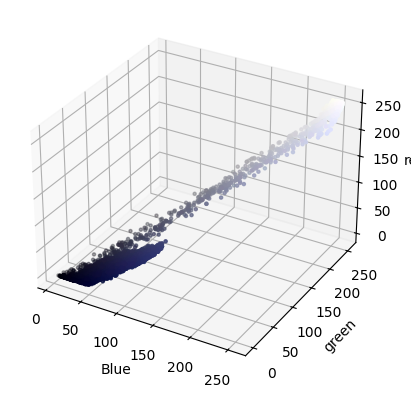

In [6]:
r, g, b = cv.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(b.flatten(), g.flatten(), r.flatten(),
            facecolors=pixel_colors, marker=".")
axis.view_init(elev=30, azim=300)
axis.set_xlabel("Blue")
axis.set_ylabel("green")
axis.set_zlabel("red")
plt.show()

From this plot, you can see that the black and blue parts of the image span across almost the entire range of red, green and blue values. Since the pixel points belonging to the blue pants stretch over the whole plot, segmenting blue pant out in RGB space based on RGB values would not be easy.

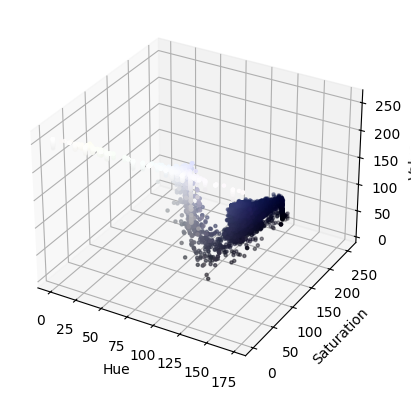

In [8]:
img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.ravel(), s.ravel(), v.ravel(),
            facecolors=pixel_colors, marker=".")
axis.view_init(elev=30, azim=300)
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

The majority of the blue points are concentrated around hue range of $[80, 120]$.

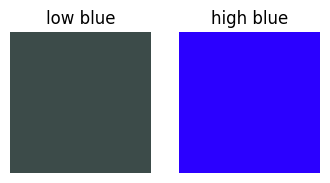

In [9]:
# define blue color
blue_low = (85, 50, 75)
blue_high = (125, 255, 255)

blue_low_patch = np.full((10, 10, 3), blue_low, dtype=np.uint8)
blue_high_patch = np.full((10, 10, 3), blue_high, dtype=np.uint8)

blue_low_rgb = cv.cvtColor(blue_low_patch, cv.COLOR_HSV2RGB)
blue_high_rgb = cv.cvtColor(blue_high_patch, cv.COLOR_HSV2RGB)

from utils import matplotlib_show_images
matplotlib_show_images([blue_low_rgb, blue_high_rgb], 1, 2, 
                      titles=["low blue", "high blue"], figsize=(4, 8))

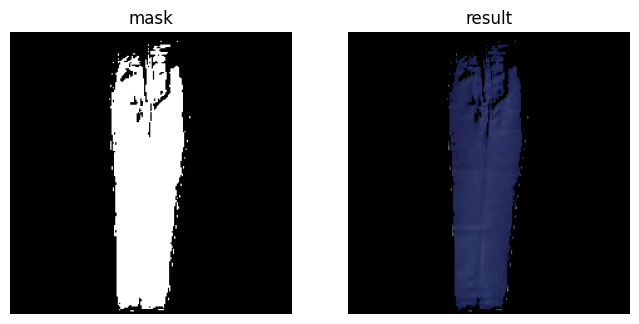

In [10]:
mask = cv.inRange(img_hsv, blue_low, blue_high)
res = cv.bitwise_and(img, img, mask=mask)

matplotlib_show_images([mask, res], 1, 2, titles=("mask", "result"),
                      figsize=(8, 4))

In [13]:
def color_segment(img, low_col, high_col, smooth=True):
    """Color based segmentation approach
    Arguments:
    ---
    img: source image (RGB)
    low_col, high_color: 3 element HSV vector (tuple)
    smooth: Gaussian blurring or not
    
    Returns:
    ---
    masked image (uint8)"""
    ori_img = img.copy()

    if smooth:
        img = cv.GaussianBlur(img, (5, 5), 0)

    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

    mask = cv.inRange(img_hsv, low_col, high_col)

    return cv.bitwise_and(ori_img, ori_img, mask=mask)

imgs = []

for i in range(1, 6):
    img_pant = cv.imread(cv.samples.findFile(f"images/color_spaces/pant{i}.jfif"))
    img_pant = cv.cvtColor(img_pant, cv.COLOR_BGR2RGB)
    imgs.append(img_pant)

res = [color_segment(img, blue_low, blue_high) for img in imgs]

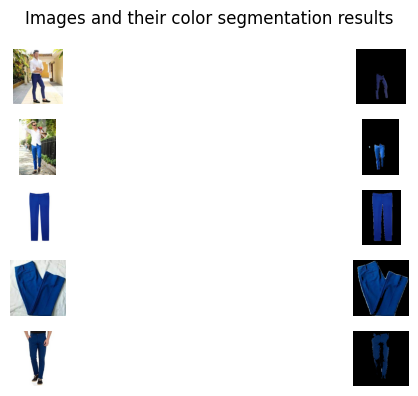

In [14]:
fig, ax = plt.subplots(5, 2, figsize=(10, 4))

for i in range(len(res)):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")

fig.suptitle("Images and their color segmentation results")
plt.tight_layout()
plt.show()

# IOU and Dice coefficient implementation
Formula of Intersection Over Union (IOU):

$$IOU = \frac{A \cap B}{A \cup B}$$

where $A$ and $B$ are predicted and ground truth bounding boxes respectively.

Formula of Dice coefficient:

$$Dice = \frac{2 \times (A \cap B)}{A + B}$$

In [1]:
def computeIOUorDice(boxA, boxB, mode="IOU"):
    """IOU computation
    Arguments:
    ---
    boxA: bounding box in (x1, y1, x2, y2)
    boxB: same format as boxA
    mode: "IOU" or "Dice"
    
    Returns:
    ---
    Scalar IOU value"""
    x_start = max(boxA[0], boxB[0])
    y_start = max(boxA[1], boxB[1])
    x_end = min(boxA[2], boxB[2])
    y_end = min(boxA[3], boxB[3])

    intersection_area = max(0, (x_end-x_start+1)) * max(0, (y_end-y_start+1))

    # area of bounding boxes
    areaA = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    areaB = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    if mode == "IOU":
        return intersection_area / (areaA + areaB - intersection_area)
    elif mode == "Dice":
        return (2 * intersection_area) / (areaA + areaB)

In [10]:
img = cv.imread("images/lena.jfif")

bbs = cv.selectROIs("bounding boxes", img, showCrosshair=False)

cv.destroyAllWindows()

In [4]:
bbs

array([[90, 82, 64, 88],
       [64, 49, 49, 63]])

In [5]:
def convert_xywh_to_xyxy(box):
    return [box[0], box[1], box[0] + box[2], box[1] + box[3]]

In [11]:
gt = convert_xywh_to_xyxy(bbs[0])
pred = convert_xywh_to_xyxy(bbs[1])

img_copy = img.copy()
cv.rectangle(img_copy, (gt[0], gt[1]), (gt[2], gt[3]), (0, 0, 255), 1)
cv.rectangle(img_copy, (pred[0], pred[1]), (pred[2], pred[3]), (255, 0, 0), 1)
cv.putText(img_copy, f"IOU: {computeIOUorDice(gt, pred, mode="Dice"):.3f}", (10, 25),
          cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

from utils import display_image
display_image("IOU", img_copy)